# brazil-covid-19

Import section:

In [19]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot

Configs section:

In [20]:
seaborn.set_style("whitegrid")
seaborn.set_context("talk")

Variables section:

In [21]:
categories = ['confirmed', 'deaths', 'recovered']
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv']
minimums_to_analize = [10000, 500, 200]
minimums_to_plot = [50, 1, 1]

Function section:

In [22]:
def replace_less_than_with_nan(dataframe, less_than):
    for column in dataframe:
        if column == 'Country/Region':
            continue
        dataframe[column] = dataframe[column].astype(int)
        dataframe.loc[dataframe[column] < less_than, [column]] = numpy.nan
    return dataframe

def move_nans_to_right(dataframe):
    temp_dataframe = dataframe.apply(lambda x: pandas.Series(x.dropna().values), axis=1)
    temp_dataframe = temp_dataframe.reindex(columns=range(len(dataframe.columns)))
    temp_dataframe.columns = dataframe.columns
    return temp_dataframe

## Core

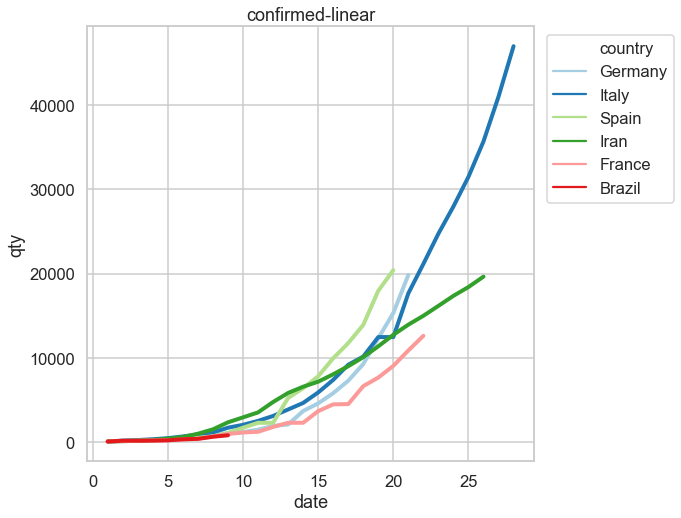

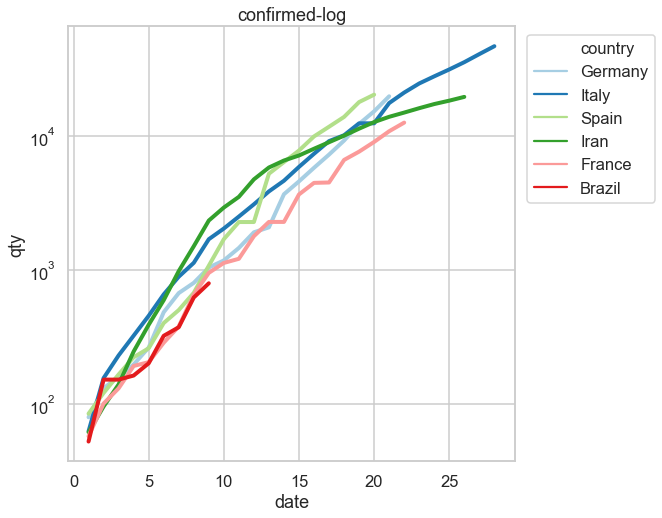

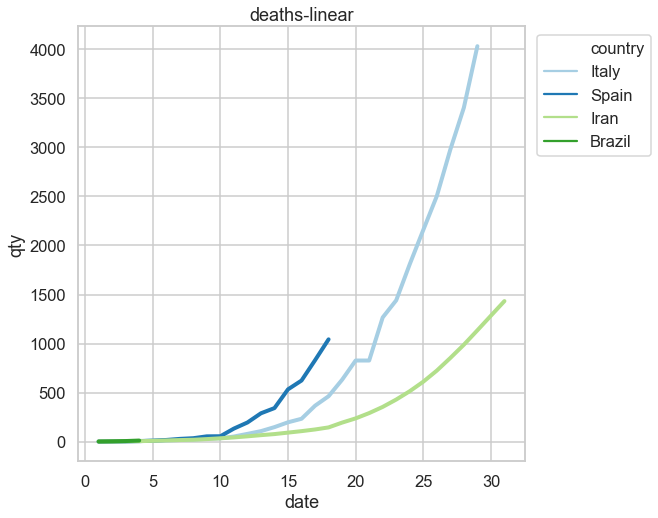

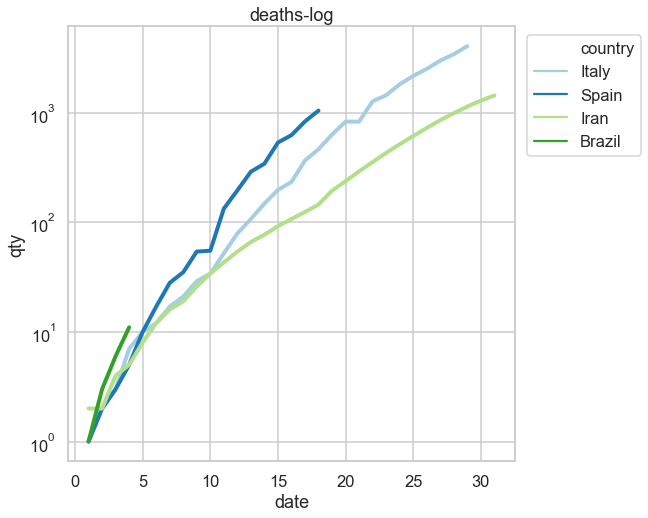

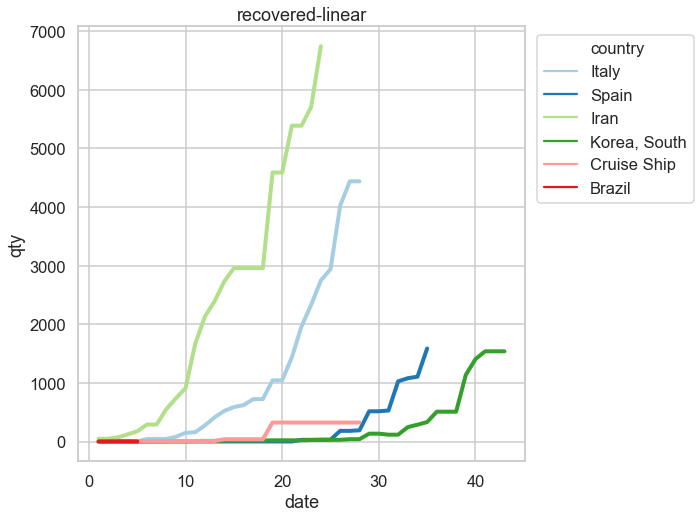

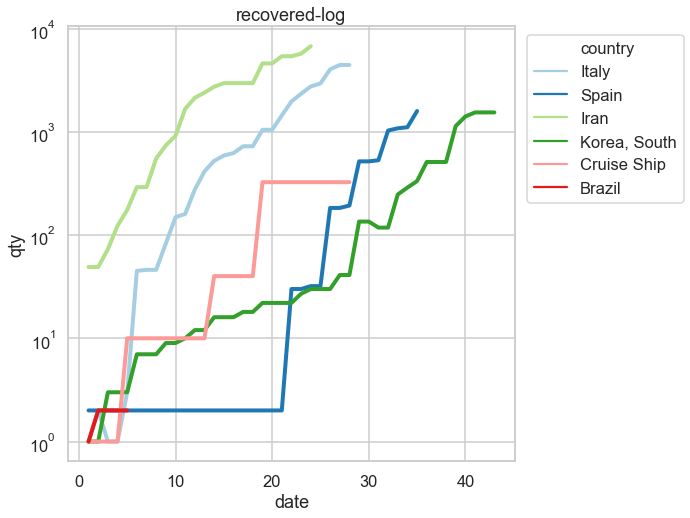

In [23]:
for category, url, minimum_to_analize, minimum_to_plot in zip(categories, urls, minimums_to_analize, minimums_to_plot):

    data = pandas.read_csv(url)
    data.drop(['Lat', 'Long','Province/State'], axis=1, inplace = True)
    data = data[~data['Country/Region'].str.contains("China")]
    brazil_data = data[data["Country/Region"].str.match('Brazil')]
    data = data[data[data.columns[-1]] > minimum_to_analize]
    data = data.append(brazil_data, ignore_index=True)
    data = replace_less_than_with_nan(data, minimum_to_plot)
    data = move_nans_to_right(data)
    data.rename(columns={x:y for x,y in zip(data.columns,range(0,len(data.columns)))}, inplace = True)
    data.rename(columns={ data.columns[0]: "country" }, inplace = True)
    data = data.melt(id_vars=['country'], var_name='date', value_name='qty')
    chart_types = ['linear', 'log']
    for chart_type in chart_types:
        fig, ax = pyplot.subplots(figsize=(8,8))
        if chart_type == 'log':
            ax.set(yscale="log")
        elif chart_type == 'linear':
            ax.set(yscale="linear")
        lineplot = seaborn.lineplot(x="date", y="qty", data=data, hue="country", linewidth=4, palette="Paired")
        pyplot.legend(bbox_to_anchor=(1.01, 1), loc=2)
        pyplot.title(category + "-" + chart_type)
        pyplot.savefig('images/' + category + "-" + chart_type + ".png", bbox_inches = "tight")
    data = None